# Tarea 3
Gabriel De La Parra

## Modulo 2 - Medición de forma celular
En este punto debe utilizar la segmentación resultante del punto anterior, y una segmentación de referencia que se entregó por u-cursos. Identifique cada una de las células en el epitelio (objetos conectados de un tamaño mínimo de 100 pixeles). Para cada uno de estos objetos obtenga las mediciones que se piden (posición, área, elongación).

En esta demostración, se entregarán primero los resultados y posteriormente el proceso paso a paso.

In [1]:
%matplotlib inline

from scipy import ndimage as ndi
from skimage import io, img_as_ubyte, feature, morphology, filters, exposure, img_as_uint, measure, segmentation
import matplotlib.pylab as plt
import matplotlib
import numpy as np
from PM2 import anisodiff2

#Ajustar el tamaño de las imágenes:
matplotlib.rcParams['figure.figsize'] = (14,12)

Found: 388 regions!


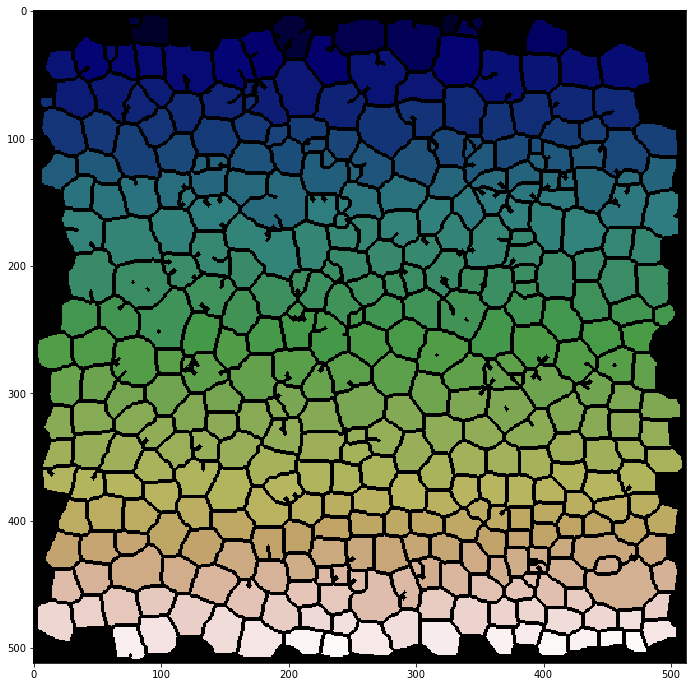

Interactive filtering


In [22]:
from ipywidgets import interact, widgets
from IPython import display

images = io.imread("./images/raw.tif")
image = images[0]

def on_button_clicked(b):
    plot()
    
def plot(equalize=False, adaptEq=True, anis=True, niter=3, kappa=30, laplace=False, gauss=False,sigma=.5, thres=True, otsu=0, dilat=0, skel=True, remove=True, min_size=4, clear=True, Filter=True, labels=True):
    image = images[0]

    if(Filter):
        image = np.invert(image)

        if(equalize):
            image = exposure.equalize_hist(image)
        if(adaptEq):
            image = exposure.equalize_adapthist(image)

        if(anis):
            image = anisodiff2(image, niter, kappa)

        if(laplace):
            image = filters.laplace(image)
        if(gauss):
            image = filters.gaussian(image, sigma)

        if(thres):
            image = image < (filters.threshold_otsu(image) + otsu)
        
        if(dilat>0):
            for i in range(0,dilat):
                image = morphology.binary_dilation(image)
        
        if(remove):
            #image = morphology.remove_small_holes(image, min_size=min_size, connectivity=8)
            image = morphology.remove_small_objects(image, min_size=min_size, connectivity=8)
        
        if(skel):
            image = morphology.skeletonize(image)
            image = morphology.binary_dilation(image)

        if(clear):
            image = np.invert(image)
            image = segmentation.clear_border(image)
    
    if Filter and labels:
        label,_ = ndi.label(image)
        regions = measure.regionprops(label)
        plt.imshow(label, cmap="gist_earth")
        print("Found:",len(regions),"regions!")
        plt.show()
    
    
    if not labels or not Filter:
        print("Image:")
        plt.imshow(image, cmap="gray")
        plt.show()
    
    print("Interactive filtering")
    
minSizeSlider = widgets.IntSlider(value=8, min=0, max=200, description='Min Size:')
otsuSlider = widgets.IntSlider(value=0, min=-20, max=20, description='Otsu Bias:')
nIterSlider = widgets.IntSlider(value=2, min=1, max=200, description='Anif N:')
kappaSlider = widgets.IntSlider(value=50, min=1, max=200, description='Anif K:')
dilatSlider = widgets.IntSlider(value=4, min=0, max=6, description='Dilat:')

interact(plot, min_size=minSizeSlider, otsu=otsuSlider, niter=nIterSlider, kappa=kappaSlider, dilat = dilatSlider)

## Modulo 2 - Medición de forma celular
En este punto debe utilizar la segmentación resultante del punto anterior, y una segmentación de referencia que se entregó por u-cursos. Identifique cada una de las células en el epitelio (objetos conectados de un tamaño mínimo de 100 pixeles). Para cada uno de estos objetos obtenga las mediciones que se piden (posición, área, elongación).

En esta demostración, se entregarán primero los resultados y posteriormente el proceso paso a paso.

### Modulos utilizados

In [3]:
%matplotlib inline
from skimage import io, morphology, measure
from scipy import ndimage as ndi
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Ajustar el tamaño de las imágenes:
matplotlib.rcParams['figure.figsize'] = (14,12)

### Segmentación de celulas y filtrado de objetos pequeños
Si bien se solicita que se filtre sobre objetos mayores a 100px, se entrega una visualización sobre los resultados de filtrar sobre tamaños mayores.

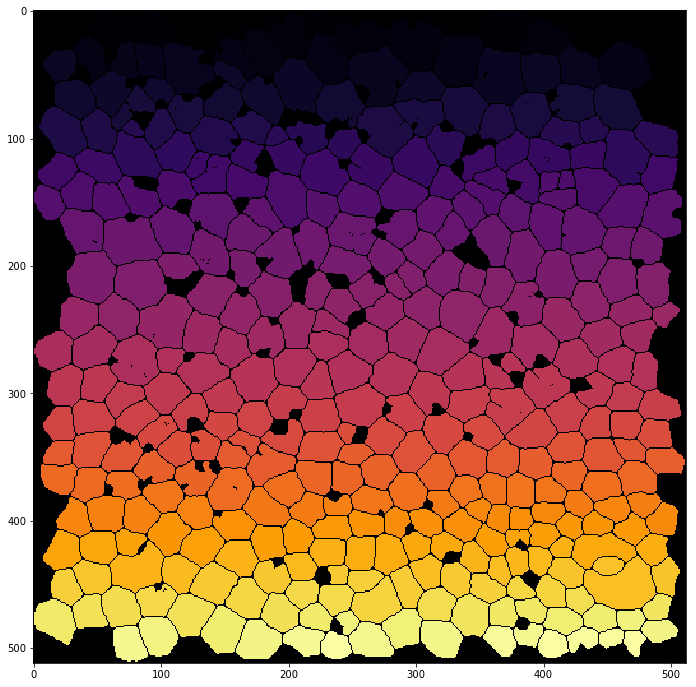

Found: 350 regions!


<function __main__.plot>

In [4]:
from ipywidgets import interact, widgets
from IPython import display

image = io.imread("./images/segmentacion_referencia.tif")
image = image[0]

plot(100)

def plot(min_size):
    fill = morphology.binary_erosion(image)
    fill = morphology.remove_small_objects(fill,connectivity=8,min_size=min_size)
    fill = morphology.binary_dilation(fill)
    
    label,_ = ndi.label(fill)
    regions = measure.regionprops(label)
    
    display.clear_output()
    plt.imshow(label, cmap="inferno")
    plt.show()
    
    print("Found:",len(regions),"regions!")

slider = widgets.IntSlider(value=100, min=0, max=1000, description='Min Size:')

interact(plot, min_size=slider)

### Identificación de características
En la siguiente visualización, se entrega una forma dinámica de identificar las distintas células según los parámetros solicitados.

In [5]:
import mpld3
from mpld3 import plugins

image = io.imread("./images/segmentacion_referencia.tif")
image = image[0]

fig, ax = plt.subplots()

fill = morphology.binary_erosion(image)
fill = morphology.remove_small_objects(fill,connectivity=8,min_size=100)
fill = morphology.binary_dilation(fill)
    
label,_ = ndi.label(fill)
regions = measure.regionprops(label)

img = ax.imshow(label, cmap="magma")
N = len(regions)
scatter = ax.scatter(x=[i.centroid[1] for i in regions], 
           y=[i.centroid[0] for i in regions],
           alpha=0,
           s=[i.equivalent_diameter*50  for i in regions])

labels = ['<h1><p>&lambda;1: {0:.2f}</p><p>&lambda;2: {1:.2f}</p><p>Área: {2}</p> <p>Elongación: {3:.2f}</p></h1>'.format(i.major_axis_length, i.minor_axis_length,i.filled_area, (1 - (float(i.minor_axis_length)/float(i.major_axis_length)))) for i in regions if i.area>1]

tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels=labels, css="h1 {color:black; text-shadow: 2px 0 0 #fff, -2px 0 0 #fff, 0 2px 0 #fff, 0 -2px 0 #fff, 1px 1px #fff, -1px -1px 0 #fff, 1px -1px 0 #fff, -1px 1px 0 #fff;}")
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

### Proceso paso a paso

#### Visualización imágen

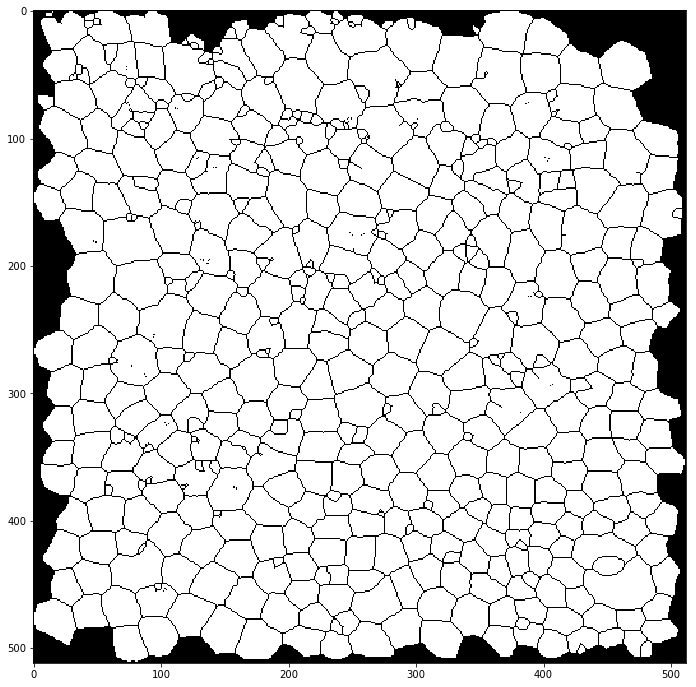

In [6]:
image = io.imread("./images/segmentacion_referencia.tif")
image = image[0]
plt.imshow(image, cmap="gray")
plt.show()

#### Erosión
Se realiza erosión para marcar los bordes. Sin este proceso, no se pueden eliminar los objetos pequeños.

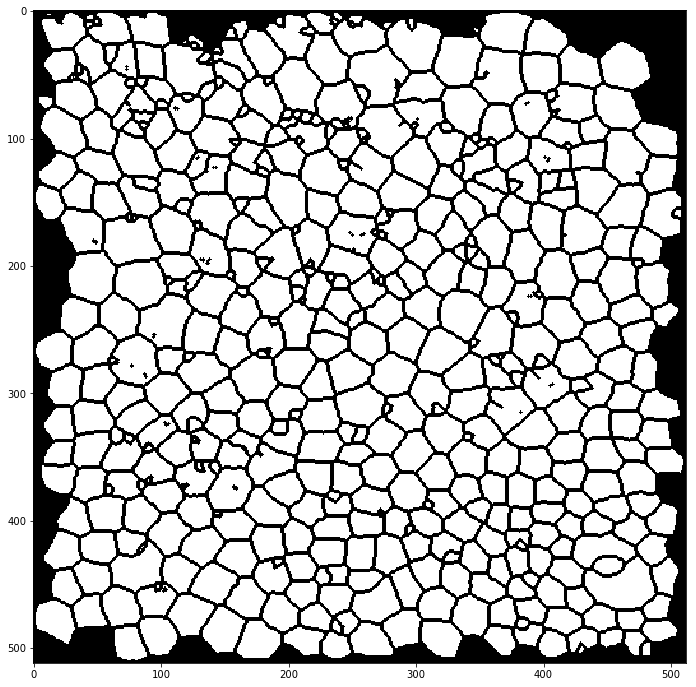

In [7]:
fill = morphology.binary_erosion(image)
plt.imshow(fill, cmap="gray")
plt.show()

#### Eliminar objetos pequeños
En este caso, se filtran los objetos con tamaño menor a 100 en conectividad 8.

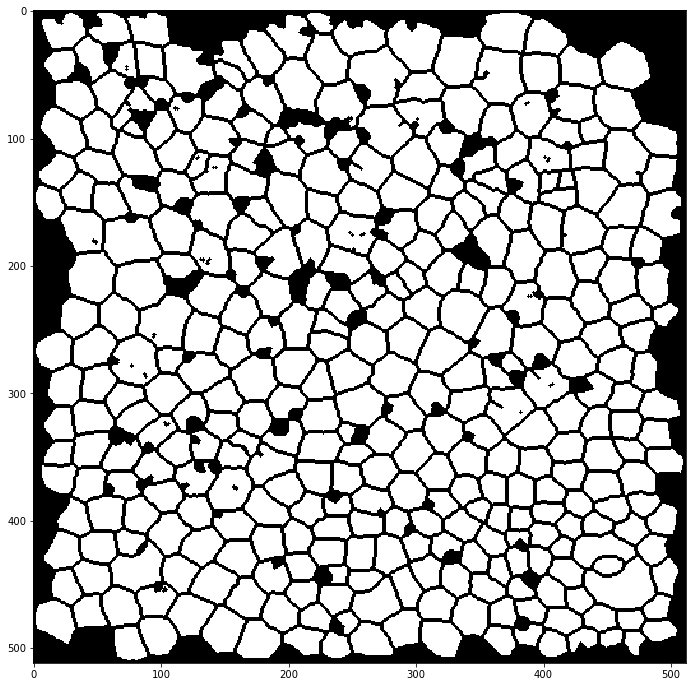

In [8]:
fill = morphology.remove_small_objects(fill,connectivity=8,min_size=100)
plt.imshow(fill, cmap="gray")
plt.show()

#### Dilatación
Se procede a realizar una dilatación para contrarestar la erosión anterior.

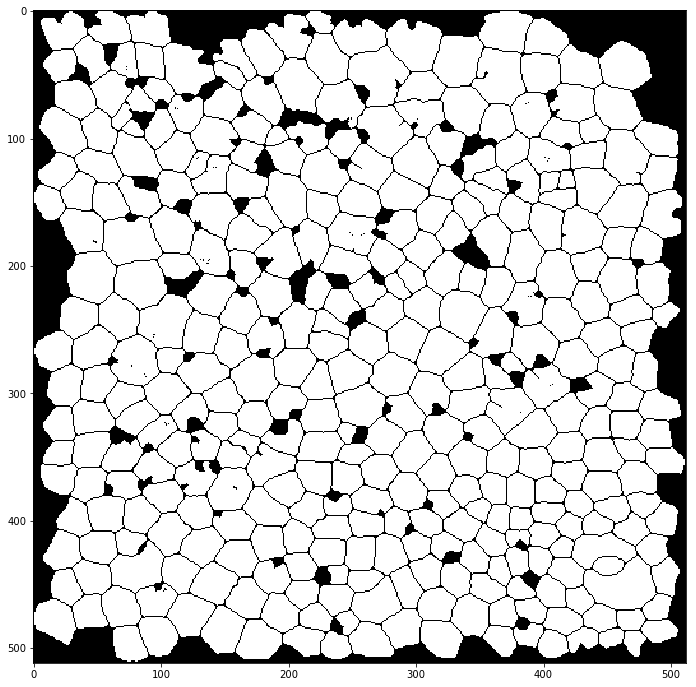

In [9]:
fill = morphology.binary_dilation(fill)
plt.imshow(fill, cmap="gray")
plt.show()

#### Etiquetar y obtener propiedades de las regiones

In [10]:
label,_ = ndi.label(fill)
regions = measure.regionprops(label)

#### Descripción de las regiones
En este caso se filtran las regiones que tengan áreas menores a 1px.

In [11]:
i = 1
for region in regions:
    if region.filled_area > 1:
        print()
        print("Región: ",i)
        print("Centroid:", region.centroid)
        print("Axis:",region.minor_axis_length,";", region.major_axis_length)
        print("Area:", region.filled_area)
        print("Elongación", 1-(region.minor_axis_length/region.major_axis_length))
        i+=1


Región:  1
Centroid: (15.96635262449529, 23.912516823687753)
Axis: 28.09458223415841 ; 35.974597255148204
Area: 743
Elongación 0.2190438704595119

Región:  2
Centroid: (14.26580226904376, 60.431118314424637)
Axis: 26.444409173894353 ; 31.827213164768455
Area: 617
Elongación 0.1691258346436899

Región:  3
Centroid: (14.223011363636363, 91.389204545454547)
Axis: 26.302392594816872 ; 35.566022951282875
Area: 704
Elongación 0.26046292466141086

Región:  4
Centroid: (8.8053435114503813, 224.87022900763358)
Axis: 14.739017074232311 ; 23.062315624542293
Area: 262
Elongación 0.3609047194485775

Región:  5
Centroid: (15.726377952755906, 370.05413385826773)
Axis: 33.01521446435383 ; 40.60772146224881
Area: 1016
Elongación 0.18697200247872547

Región:  6
Centroid: (19.90268886043534, 201.87451984635084)
Axis: 31.114688110171777 ; 35.96320883434229
Area: 781
Elongación 0.13481891303149018

Región:  7
Centroid: (21.651577503429355, 401.27709190672152)
Axis: 28.081938950940245 ; 34.68222347400086
A

#### Visualizar resultado

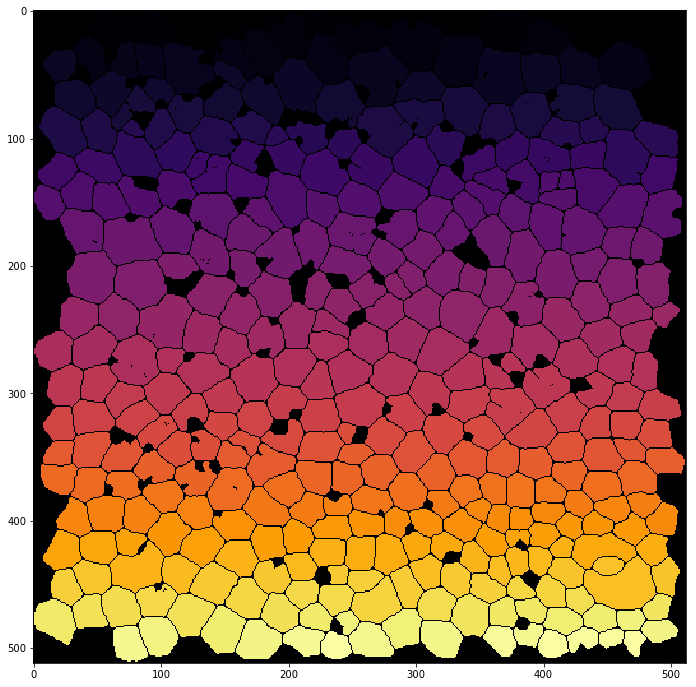

In [12]:
plt.imshow(label, cmap="inferno")
plt.show()